In [1]:
try:
    import pandas as pd
    import numpy as np 
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    sns.set(color_codes=True)
    
    print("all loaded")
except:
    print("error")

all loaded


#### Dataset

In [2]:
data = pd.read_csv("random10.csv")

data.index

RangeIndex(start=0, stop=10000, step=1)

In [3]:
data.describe()

,seic,seic_benefit,health,health_benefit,house,house_benefit,nutrition,nutrition_benefit,livelihood,livelihood_benefit,education,education_benefit,scheme1,scheme2
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,58.646900,50262.961200,59.787400,40247.36220,65.027200,39992.306400,54.839200,39814.456000,50.09870,49714.019400,65.483600,39895.112500,59.962000,54.772300
std,10.849746,28940.959236,23.634002,23320.27922,20.495025,22985.635879,26.191925,22882.348412,29.17101,28768.363387,20.618134,23091.447788,23.495216,26.182487
min,22.000000,3.000000,20.000000,12.00000,30.000000,5.000000,10.000000,7.000000,0.00000,11.000000,30.000000,5.000000,20.000000,10.000000
25%,51.000000,25175.500000,39.000000,19706.25000,47.000000,20307.000000,32.000000,20124.250000,25.00000,25008.750000,47.000000,19929.000000,40.000000,32.000000
50%,59.000000,50334.000000,60.000000,40792.50000,65.000000,39675.000000,55.000000,39974.000000,50.00000,49817.500000,66.000000,39623.000000,60.000000,55.000000
75%,66.000000,75413.250000,80.000000,60396.00000,83.000000,60144.000000,77.000000,59045.500000,75.00000,74367.250000,83.000000,60055.500000,80.000000,77.000000
max,93.000000,99997.000000,100.000000,79996.00000,100.000000,79996.000000,100.000000,79998.000000,100.00000,99998.000000,100.000000,79996.000000,100.000000,100.000000


In [4]:
# Differentiating Scores and Benefit data for processing
scores_data = data[["seic","health","house","nutrition","livelihood","education","scheme1","scheme2"]]
scores_data.head()
scores_data

,seic,health,house,nutrition,livelihood,education,scheme1,scheme2
0,54,77,48,48,37,62,89,94
1,65,51,66,82,71,56,20,23
2,79,98,97,89,32,81,80,29
3,63,41,70,87,45,72,47,66
4,36,53,54,34,10,30,44,10
...,...,...,...,...,...,...,...,...
9995,61,75,85,17,79,53,48,30
9996,72,65,33,82,95,89,89,61
9997,52,43,68,53,33,64,43,56
9998,68,32,100,60,61,88,85,35


#### Outliers if any:

<function matplotlib.pyplot.show(close=None, block=None)>

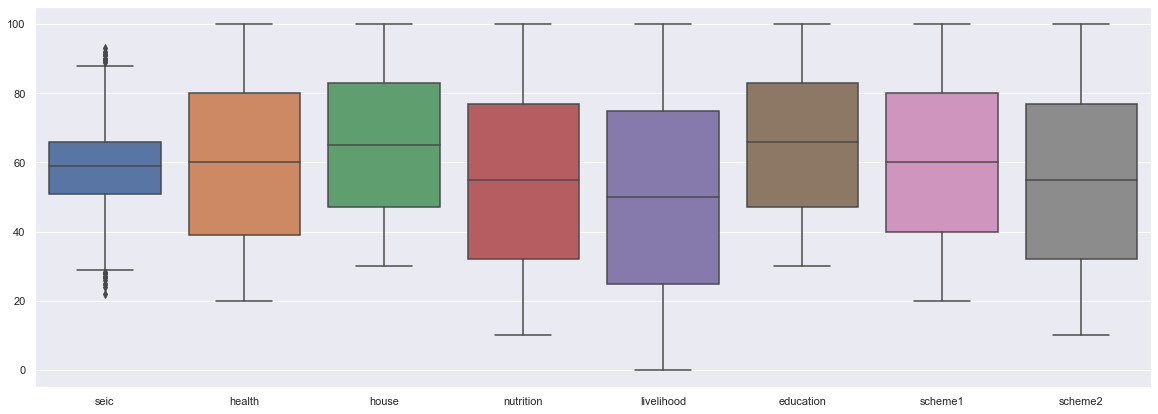

In [5]:
from matplotlib.pyplot import figure
figure(figsize= (20,7))
scores_data1 = scores_data[["seic","health","house","nutrition","livelihood","education","scheme1","scheme2"]]
sns.boxplot(data=scores_data1)
plt.show

In [6]:
benefit_amount_data = data[["seic_benefit","health_benefit","house_benefit","nutrition_benefit",
                            "livelihood_benefit","education_benefit","scheme1_benefit","scheme2_benefit"]]
benefit_amount_data.head()

,seic_benefit,health_benefit,house_benefit,nutrition_benefit,livelihood_benefit,education_benefit,scheme1_benefit,scheme2_benefit
0,97930,76494,48429,6586,7219,74548,Non-Eligible,Eligible
1,1377,26442,66576,43498,91686,24616,Non-Eligible,Non-Eligible
2,88404,74235,61040,55503,60424,56585,Eligible,Eligible
3,7618,74392,42888,24656,46427,45466,Non-Eligible,Non-Eligible
4,11917,27091,755,2402,3016,9648,Non-Eligible,Non-Eligible


<function matplotlib.pyplot.show(close=None, block=None)>

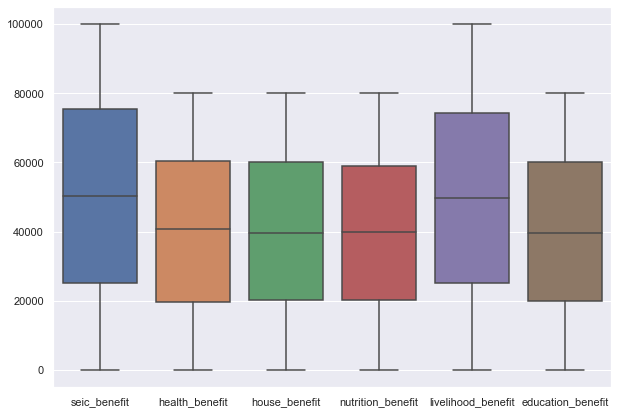

In [7]:
figure(figsize= (10,7))
sns.boxplot(data=benefit_amount_data)
plt.show

#### Train test split

In [8]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.3,random_state= 3)
train.shape,test.shape

((7000, 24), (3000, 24))

#### Label Encoding Categorical Data

In [9]:
#Differentiating Numerical and Categorical Data for further processing

#Categorical
train_categorical = train.select_dtypes(exclude = ['int64'])
test_categorical = test.select_dtypes(exclude = ['int64'])

#Numerical
train_numerical = train.select_dtypes(include = ['int64'])
test_numerical = test.select_dtypes(include = ['int64'])

#Encoding Categorical data
from sklearn.preprocessing import LabelEncoder
train_categorical_en = train_categorical.apply(LabelEncoder().fit_transform)
test_categorical_en = test_categorical.apply(LabelEncoder().fit_transform)

In [10]:
print(train_categorical_en[train_categorical_en['SEIC ERROR'] > 1].head(1))
train_categorical["SEIC ERROR"].loc[5795]

#Hence, 2 of categorical encoded defines : No error

      SEIC ERROR  Health ERROR  House ERROR  Nutrition ERROR  \
5795           2             2            1                2   

      livelihood ERROR  Education ERROR  scheme1_benefit  Scheme-1 ERROR  \
5795                 2                1                0               2   

      scheme2_benefit  Scheme-2 ERROR  
5795                1               2  


'No Error'

In [11]:
print(train_categorical_en[train_categorical_en['SEIC ERROR'] == 0].head(1))
train_categorical["SEIC ERROR"].loc[8317]

      SEIC ERROR  Health ERROR  House ERROR  Nutrition ERROR  \
8317           0             2            1                2   

      livelihood ERROR  Education ERROR  scheme1_benefit  Scheme-1 ERROR  \
8317                 2                1                0               2   

      scheme2_benefit  Scheme-2 ERROR  
8317                0               2  


'EOE'


Hence Categorical Encoded Indicators:

- 0 of categorical encoded defines : EOE
- 1 of categorical encoded defines : EOI
- 2 of categorical encoded defines : No error

In [38]:
#Combining Numerical and Categorical
train_new = pd.concat([train_categorical_en,train_numerical],axis=1)
test_new = pd.concat([test_categorical_en,test_numerical],axis=1)

train_categorical.head()

,SEIC ERROR,Health ERROR,House ERROR,Nutrition ERROR,livelihood ERROR,Education ERROR,scheme1_benefit,Scheme-1 ERROR,scheme2_benefit,Scheme-2 ERROR
5795,No Error,No Error,No Error,No Error,No Error,No Error,Eligible,No Error,Non-Eligible,No Error
1490,No Error,EOI,No Error,No Error,No Error,No Error,Non-Eligible,No Error,Eligible,No Error
3807,No Error,No Error,No Error,No Error,No Error,No Error,Eligible,No Error,Non-Eligible,No Error
3042,No Error,EOE,No Error,No Error,No Error,No Error,Eligible,No Error,Eligible,No Error
4064,No Error,No Error,No Error,EOE,No Error,No Error,Eligible,No Error,Eligible,No Error


#### Defining Target and Independent Variable:

In [13]:
#defining independent variable:

train_factors_seic = train_new[["seic","seic_benefit","SEIC ERROR"]]
test_factors_seic = test_new[["seic","seic_benefit","SEIC ERROR"]]

X_train_seic = train_factors_seic.drop(["SEIC ERROR"],axis=1)
y_train_seic = train_factors_seic["SEIC ERROR"]


X_test_seic = test_factors_seic.drop(["SEIC ERROR"],axis=1)
y_test_seic = test_factors_seic["SEIC ERROR"]

X_train_seic.shape,X_test_seic.shape

((7000, 2), (3000, 2))

#### Model1 - KNN Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
modelc = KNeighborsClassifier()

clf = modelc.fit(X_train_seic,y_train_seic)
prediction_c = modelc.predict(X_test_seic)


scoreC_test = modelc.score(X_test_seic, y_test_seic)
print('Accuracy Score: ', scoreC_test)

Accuracy Score:  0.9613333333333334


In [16]:
#No of unique values in array:
len(set(prediction_c))

2

In [17]:
(set(prediction_c))   #KNN didnt consider EOE Cases

{0, 2}

#### Model 2 : Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_logr = LogisticRegression()
logr = model_logr.fit(X_train_seic,y_train_seic)
prediction_logr = model_logr.predict(X_test_seic)


score_logr_test = model_logr.score(X_test_seic, y_test_seic)
print('Accuracy Score: ', score_logr_test)

Accuracy Score:  0.9646666666666667


In [19]:
len(set(prediction_logr))

2

In [20]:
set(prediction_logr)    #Logistic Regression Didnt consider EOI cases

{1, 2}

#### Model 3 : Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=100)
rfc = model_rfc.fit(X_train_seic,y_train_seic)
prediction_rfc = model_rfc.predict(X_test_seic)


score_rfc_test = model_rfc.score(X_test_seic, y_test_seic)
print('Accuracy Score: ', score_rfc_test)

len(set(prediction_rfc))

Accuracy Score:  0.9993333333333333


3

#### Model 4: Decision Tree Classifier(CART): Best performer

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_dtc = DecisionTreeClassifier(random_state =0 , max_depth = 10)
dtc = model_dtc.fit(X_train_seic,y_train_seic)
prediction_dtc = model_dtc.predict(X_test_seic)


score_dtc_test = model_dtc.score(X_test_seic, y_test_seic)
print('Accuracy Score: ', score_dtc_test)

Accuracy Score:  0.9996666666666667


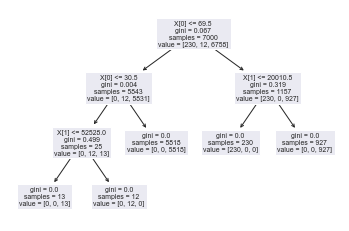

In [34]:
tree.plot_tree(dtc);

In [24]:
len(set(prediction_dtc))

3

In [25]:
(set(prediction_dtc))

{0, 1, 2}

In [26]:
set(y_test_seic)

{0, 1, 2}

- 0 : eoe
- 1 : eoi
- 2 : No error

#### Plotting Test Dataset:

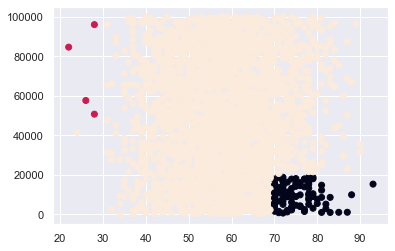

In [27]:
x = test["seic"]
y =  test["seic_benefit"]

group = y_test_seic

plt.scatter(x, y, c = group,label =group )
plt.show()

#### Plotting Prediction Results for Decision Tree

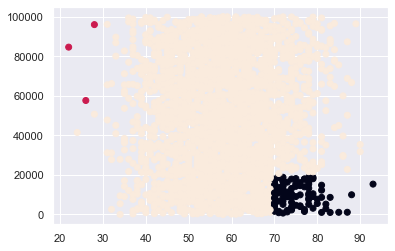

In [28]:
x = test["seic"]
y =  test["seic_benefit"]

plt.scatter(x, y, c = prediction_dtc,label = prediction_dtc)
plt.show()